## Extract and Remove Value/Unit from catalog_content
This cell extracts the Value and Unit from the end of `catalog_content`, creates two new columns, and then strips these details from the original text.

# Import Libraries and Create Directories

In [54]:
import os
import pandas as pd
import numpy as np
from IPython import display
from urllib.parse import urlparse, unquote
import re
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

move the csv files into the 'dataset' directory after creating it

In [55]:
# projects_dir_path = os.path.join(os.getcwd(), "projects")
# # os.makedirs(projects_dir_path, exist_ok=True)
# price_predict_project_path = os.path.join(projects_dir_path, "price_predict")
# os.makedirs(price_predict_project_path, exist_ok=True)
# os.chdir(price_predict_project_path)

In [56]:
# put your own directory path where the dataset is located
os.chdir(r'C:\Users\alvin\Desktop\projects\price_predict\dataset')

In [57]:
os.listdir()

['images',
 'projects',
 'sample_test.csv',
 'sample_test_out.csv',
 'test.csv',
 'train.csv']

In [58]:
# datasets_dir_path = os.path.join(price_predict_project_path, "dataset")
# os.chdir(datasets_dir_path)
# os.listdir()

In [59]:
train_df = pd.read_csv("train.csv")
train_df.sample(3)

,sample_id,catalog_content,image_link,price
50006,267453,"Item Name: FIJI Natural Artesian Water 330 mL / 11.15 Fl Ounce Bottle (Pack of 6) - 100% Recycled Plastic\nBullet Point 1: Pack size- Pack of 6, 330mL (11.15 Fl Oz) bottles of FIJI Water\nBullet Point 2: Everyday hydration- The 330mL is great for group events, dinner parties, kids' activities, and offices\nBullet Point 3: Double Electrolytes- FIJI Water has more than double the electrolytes as the top premium bottled water brands for a soft, smooth taste. And while theirs are added, ours occur naturally from slowly filtering through volcanic rock\nBullet Point 4: Natural artesian- Bottled from a natural, sustainable artesian aquifer in the remote Fijian Islands, untouched by man\nBullet Point 5: Soft, smooth taste- Rain slowly filters through volcanic rock, giving FIJI Water a perfectly balanced 7.7 pH, and its signature, soft smooth taste\nBullet Point 6: Our 330ml bottles are now 100% recycled plastic, bottle only\nValue: 66.9\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/71Q4B3WHcwL.jpg,7.290
42178,150256,"Item Name: Goya Foods Beef Tripe Stew with Vegetables (Mondongo), 15 Ounce (Pack of 24)\nBullet Point 1: Enjoy The Rich Fruity Flavor Of Goya's Grape Marmalade Jelly\nBullet Point 2: Go Big On Latin Flavor With Goya Mondongo, A Beef Tripe Stew With Vegetables\nBullet Point 3: Goya Beef Tripe Stew -Sopa De Mondongo Is A Soup Made From Diced Tripe (The Stomach Of A Cow Or Pig) Slow-Cooked With Vegetables Such As Bell Peppers, Onions, Carrots, Cabbage, Celery, Tomatoes, Cilantro (Coriander), Garlic Or Root Vegetables\nBullet Point 4: Item Package Dimension: 45.72cm L x 30.48cm W x 12.7cm H\nValue: 360.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/61KNMFToH0L.jpg,15.385
5484,1411,"Item Name: Mango Curry White Tea (Loose) (8 oz, ZIN: 545843)\nBullet Point 1: Our Mango Curry White Tea is a mouth-watering flavored White tea with Mango Slices, Turmeric and Cumin Seeds that you can enjoy all year round! The aroma and Mango Curry flavor is a delight! - Ingredients: White tea, Mango Slices, Turmeric, Cumin Seeds and Natural Mango Curry Flavor.\nBullet Point 2: No fillers.\nBullet Point 3: Manufacturer: TerraVita\nBullet Point 4: Size: 8 oz\nBullet Point 5: Loose Leaf White Tea - Packed in a convenient upright pouch!\nProduct Description: Our Mango Curry White Tea is a mouth-watering flavored White tea with Mango Slices, Turmeric and Cumin Seeds that you can enjoy all year round! The aroma and Mango Curry flavor is a delight! - Ingredients: White tea, Mango Slices, Turmeric, Cumin Seeds and Natural Mango Curry Flavor. - Hot tea brewing method: Bring freshly drawn cold water to a rolling boil. Place 1 teaspoon of tea for each desired cup into the teapot. Pour the boiling water into the pot, cover and let steep for 2-4 minutes. Strain and pour into your cup; add milk and natural sweeteners to taste. - Iced tea brewing method: (to make 1 liter/quart): Place 5 teaspoons of tea into a teapot or heat resistant pitcher. Pour 1 1/4 cups of freshly boiled water over the tea itself. Steep for 5 minutes. Fill a serving pitcher with 1/4 cold water. Strain and pour the tea into the serving pitcher Add ice and top-up with cold water. Sweeten and garnish to taste. - TerraVita is an exclusive line of premium-quality, natural source products that use only the finest, purest and most potent ingredients found around the world. TerraVita is hallmarked by the highest possible standards of purity, potency, stability and freshness. All of our products are prepared with the highest elements of quality control, from raw materials through the entire manufacturing process, up to and including the moment that the bottles or bags are sealed for freshness and shipped out to you. Our highest possible standards are certified by independent laboratories and backed by our personal guarantee. - TerraVita exists to meet and ensure your family's health and wellness without the harmful effects of che

# Check data quality

In [60]:
# Check for missing values
train_df.isnull().sum()

sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

In [61]:
# Remove 'Item Name: ' prefix from catalog_content
def remove_item_name_prefix(text):
    return text.strip().replace('Item Name:', '').strip()

train_df['catalog_content'] = train_df['catalog_content'].apply(remove_item_name_prefix)
train_df.sample(3)

,sample_id,catalog_content,image_link,price
59672,135863,New 810012 Werthers Crmy Caramel Filled Candy 2.65O (12-Pack) Hard Candy Cheap Wholesale Discount Bulk Candy Hard Candy Id Holder\nProduct Description: Werther's Creamy Caramel Filled Hard Candies\nValue: 12.0\nUnit: Count,https://m.media-amazon.com/images/I/51scABGhmwL.jpg,9.425
8379,47724,Marshmallow Peeps Yellow Chicks (Three 10ct Boxes)\nValue: nan\nUnit: None,https://m.media-amazon.com/images/I/51i0JcAr0HL.jpg,17.990
56305,231140,"Toufayan KETO Pita Bread | High Fiber and Protein, Low Carb, No Sugar (3 Pack, 15 Pitas Total)\nBullet Point 1: Upon arrival, FREEZE packages to maintain freshness for up to 8 months. Individually thaw as needed. For maximum freshness, use within 5 days of defrosting\nBullet Point 2: Manufacturing dates are stamped on each package (not expiration dates). Freeze upon delivery, thaw as needed. Storage instructions included with every order\nBullet Point 3: Delicious flat bread that fit into the ketogenic lifestyle with authentic flavor and texture\nBullet Point 4: High fiber and high protein\nBullet Point 5: Each pita is 140 calories and contains 14g of Fiber, 7g of Protein, 0g of Sugar and 5 Net Carbs per serving\nBullet Point 6: Vegan and Kosher\nBullet Point 7: Includes 3 Packages, 15 Pitas Total\nProduct Description: Toufayan Keto Pita is made with only the finest ingredients so they provide a really fresh, flavorful taste. They are satisfyingly light, resulting in the best paninis, sandwiches and flatbread pizzas. With 7g of Protein, 0g Sugar and only 140 Calories Per Serving, it’s a bread you can serve with confidence. We know your family will love the unbeatable fresh taste and texture of our Toufayan Pita.\nValue: 26.7\nUnit: Ounce",https://m.media-amazon.com/images/I/810nlV24qUL.jpg,36.880


Every single record comes with values and units except for one, do a bit of Feature Engineering

In [62]:
# Extract "Value" and "Unit" from catalog_content into two new columns, then remove them from catalog_content
def extract_value_unit_and_strip(text):
    match = re.search(r'Value:\s*([^\n]+)\s*Unit:\s*([^\n]+)', text)
    if match:
        value = match.group(1).strip()
        unit = match.group(2).strip()
        # Remove the matched part from the text
        stripped = re.sub(r'Value:\s*[^\n]+\s*Unit:\s*[^\n]+', '', text).strip()
        return pd.Series([value, unit, stripped])
    else:
        return pd.Series([None, None, text])

train_df[['value', 'unit', 'catalog_content']] = train_df['catalog_content'].apply(extract_value_unit_and_strip)

In [63]:
train_df.sample(5)

,sample_id,catalog_content,image_link,price,value,unit
27006,134399,"Rice A Roni, Stir Fried Rice Flavored, 6.2oz Box (Pack of 5)",https://m.media-amazon.com/images/I/81p8IUUKN6L.jpg,10.455,31.0,Ounce
4295,116653,"Amazon Brand - Happy Belly Ketchup, 35.3 Ounce\nBullet Point 1: One 35.3-ounce bottle of Happy Belly Ketchup\nBullet Point 2: Shake well before using. Refrigerate after opening.\nBullet Point 3: Satisfaction Guarantee: We’re proud of our products. If you aren’t satisfied, we’ll refund you for any reason within a year of purchase. 1-877-485-0385\nBullet Point 4: An Amazon Brand",https://m.media-amazon.com/images/I/71PlKlvtzjL.jpg,1.990,35.3,Ounce
70301,22440,"Watkins All Natural Original Gourmet Baking Vanilla, 32 fl. oz. Economy Sized Bottle, 1 Count (21901)\nBullet Point 1: Made with Pure Vanilla Extract and all naturally derived ingredients\nBullet Point 2: Concentrated, bake and freeze proof blend is ideal for baking\nBullet Point 3: No Artificial Colors or Flavors\nBullet Point 4: Non-GMO, Gluten Free, Corn Syrup Free, Kosher\nBullet Point 5: Crafted in the USA",https://m.media-amazon.com/images/I/61S3QO8fVKL.jpg,22.645,32.0,Fl Oz
55788,282497,"Bubblicious Bubble Gum, Watermelon Wave, 1 ct, 5 pieces\nBullet Point 1: Artificially flavored\nBullet Point 2: 5 pieces\nBullet Point 3: 0",https://m.media-amazon.com/images/I/71gMb+XVY2L.jpg,21.710,5.0,Count
68489,50909,"CHIPS AHOY! Hershey's Milk Chocolate Chip Cookies, Family Size, 14.48 oz\nBullet Point 1: 14.48 oz Family Size pack of CHIPS AHOY! Cookies with Hershey’s Milk Chocolate (packaging may vary)\nBullet Point 2: Kosher chocolate chip cookies made with CHIPS AHOY! real chocolate chips and Hershey's Milk Chocolate\nBullet Point 3: A pairing you’ll melt for with the creamy goodness of Hershey’s Milk Chocolate\nBullet Point 4: A chocolate lover’s dream, treat yourself to these chocolate chip cookies at school, work, home or as ice cream toppers\nBullet Point 5: Resealable bulk cookie family size pack keeps cookies fresh and ready for sharing",https://m.media-amazon.com/images/I/71-oGsth1JL.jpg,6.085,14.48,Ounce


In [64]:
# number of records share everything the same except for price
train_df[['catalog_content', 'image_link', 'value', 'unit']].duplicated().sum()

46

Some records share the same images, even though they are the same product, they have different quantities

In [65]:
# Get the columns we want to check
cols_to_check = ['catalog_content', 'image_link', 'value', 'unit']
# Create boolean mask of duplicated rows
duplicated_mask = train_df[cols_to_check].duplicated(keep=False)
# Filter the dataframe using the mask
dup_df = train_df[duplicated_mask].sort_values(by='image_link')
dup_df.sample(5)

,sample_id,catalog_content,image_link,price,value,unit
55814,48630,"Natural Cane Sugar,Jug",https://m.media-amazon.com/images/I/21Qqeb-waYL.jpg,11.245,48.0,Ounce
1267,264473,"Van Holten's Pickles - Jumbo Sour Pickle-In-A-Pouch - 12 Pack\nBullet Point 1: TART, TANGY, TANTILIZING. Our super sour pickle packs some serious pucker power.\nBullet Point 2: MADE BY PICKLE-LOVERS. When it comes to pouched pickles, we did it first, perfecting it since 1939.\nBullet Point 3: BOLD ON-THE-GO. Our Pickle-In-A-Pouch is the best on-the-go snack with a bold flavor to quench any salty craving.\nBullet Point 4: BETTER FOR YOU. Van Holten's Pickles are gluten-free, certified kosher, fat-free, low calorie, and low carb.\nBullet Point 5: HOMEGROWN IN WISCONSIN. Every cucumber that goes through our factory is grown, pickled, and packaged in the USA.\nProduct Description: Our Tart &amp; Tangy flavored pickle packs some bonafide pucker power!",https://m.media-amazon.com/images/I/81hcwhJRLrL.jpg,23.790,12.0,Count
71789,200808,Floral Bouquet\nProduct Description: Floral Bouquet,https://m.media-amazon.com/images/I/61IC-7eLU7L.jpg,21.980,nan,None
43596,158674,"Lorann Oils Butter Bakery Emulsion: True Butter Flavor, Ideal for Enhancing Rich Dairy Notes in Baked Goods, Gluten-Free, Keto-Friendly, Butter Flavoring Essential for Your Kitchen\nBullet Point 1: BAKING ESSENTIAL: Our 16 ounce Butter Bakery Emulsion is a vital butter extract for baking alternative among baking essentials for your kitchen, taking your baking experience to a whole new level.\nBullet Point 2: MORE IMPACT THAN AN EXTRACT: Providing a classic butter taste, our emulsion delivers a deeper impact than typical flavor extracts. Achieve that bakery-grade taste in your homemade baked goods.\nBullet Point 3: VERSATILE FLAVORING: Perfect for enhancing butter flavoring oils in cookies, cakes, and desserts, our Butter emulsion ensures your creations have a punch of flavor that won't bake out.\nBullet Point 4: GLUTEN-FREE & KETO-FRIENDLY: Catering to diverse dietary needs, our butter flavor for baking is a preferred choice in gluten-free and keto baking. Flavor without compromise!\nBullet Point 5: SUSTAINABLE PACKAGING: Packaged in BPA-free, recyclable PET plastic bottles. Our butter flavor bakery emulsion, made in the USA, promotes both taste and environmental responsibility.\nProduct Description: Stronger than your typical extract",https://m.media-amazon.com/images/I/51AxDWiaSSL.jpg,9.070,16.0,Fl Oz
11795,185463,"AmazonFresh Hazelnut Flavored Coffee, Ground, Medium Roast, 12 Ounce\nBullet Point 1: Fragrant medium-light roast with toasted hazelnut flavor\nBullet Point 2: One 12-ounce bag of ground coffee\nBullet Point 3: 100% Arabica coffee grown in Central and South America\nBullet Point 4: Roasted and packed in the U.S.A.\nBullet Point 5: Shown as a serving suggestion\nBullet Point 6: An Amazon brand",https://m.media-amazon.com/images/I/81w29mbZOtL.jpg,7.290,12.0,Ounce


In [66]:
# Group by catalog_content and image_link, then aggregate
cleaned_df = train_df.groupby(cols_to_check).agg({
    'sample_id': 'min',  # keep lowest sample_id
    'price': 'mean'      # take average of prices
}).reset_index()

# Show the first few rows to verify
cleaned_df.sample(5)

# Print the reduction in records
print(f"Original records: {len(train_df)}")
print(f"After deduplication: {len(cleaned_df)}")

Original records: 75000
After deduplication: 74953


# Download and Handle Images

In [67]:
images = train_df['image_link']
images.sample(5)

37120    https://m.media-amazon.com/images/I/81QnEoS9ayL.jpg
38225    https://m.media-amazon.com/images/I/61zOySZeZLL.jpg
67287    https://m.media-amazon.com/images/I/61wn1OHNZKL.jpg
64444    https://m.media-amazon.com/images/I/81Cy7p0NGXL.jpg
71174    https://m.media-amazon.com/images/I/81I4Texf2PL.jpg
Name: image_link, dtype: object

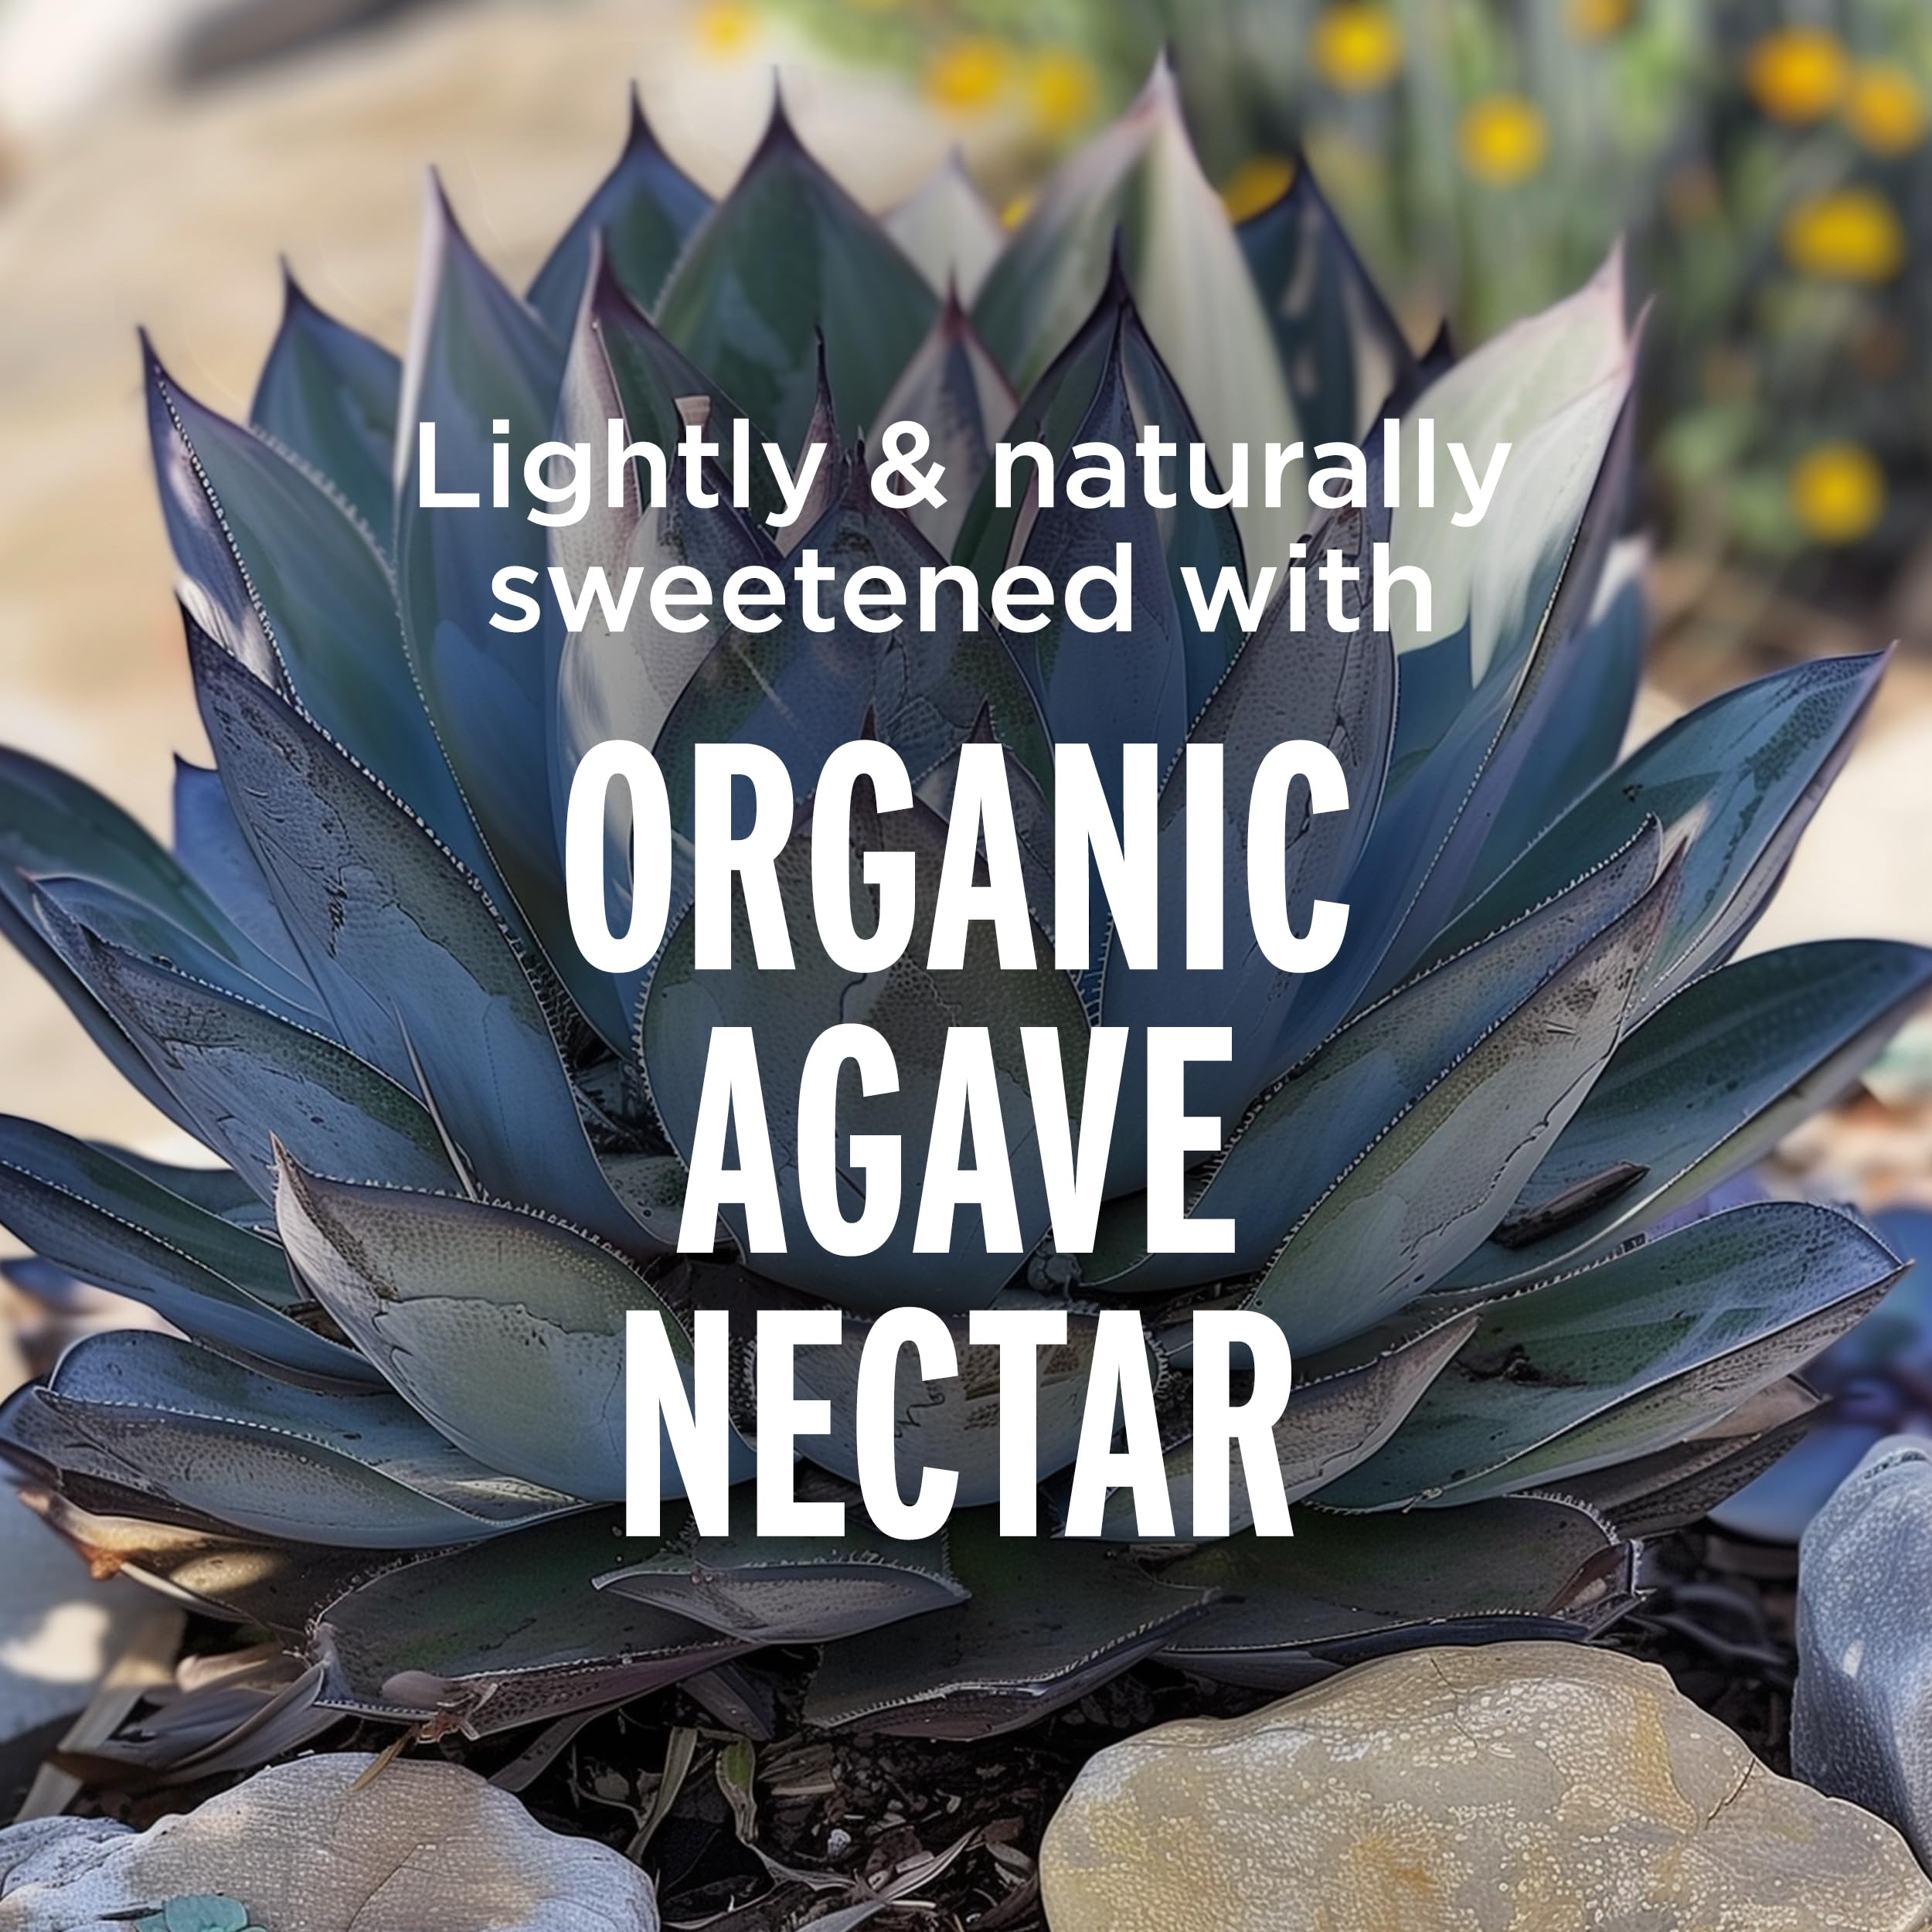

In [68]:
# Get a single image URL
test_image = images.sample(1).iloc[0] # use iloc because sample returns a Series
# test_image = images.sample(1)
display.Image(test_image, width=300, height=200)
# display.Image()

In [69]:
print(test_image)

https://m.media-amazon.com/images/I/812RGjB7qOL.jpg


In [70]:
# functions provided by Kaggle to download images
import re
import os
import pandas as pd
import multiprocessing
from time import time as timer
from tqdm import tqdm
import numpy as np
from pathlib import Path
from functools import partial
import requests
import urllib
# download single image
def download_image(image_link, savefolder):
    if(isinstance(image_link, str)):
        filename = Path(image_link).name
        image_save_path = os.path.join(savefolder, filename)
        if(not os.path.exists(image_save_path)):
            try:
                urllib.request.urlretrieve(image_link, image_save_path)    
            except Exception as ex:
                print('Warning: Not able to download - {}\n{}'.format(image_link, ex))
        else:
            return
    return
# download multiple images in parallel
def download_images(image_links, download_folder):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)
    results = []
    download_image_partial = partial(download_image, savefolder=download_folder)
    with multiprocessing.Pool(50) as pool:
        for result in tqdm(pool.imap(download_image_partial, image_links), total=len(image_links)):
            results.append(result)
        pool.close()
        pool.join()

In [71]:
os.listdir()

['images',
 'projects',
 'sample_test.csv',
 'sample_test_out.csv',
 'test.csv',
 'train.csv']

In [72]:
# images_dir_path = os.path.join(datasets_dir_path, "images")
# os.makedirs(images_dir_path, exist_ok=True)

In [73]:
# Multi-threading is somehow not working for my machine, downloading images one by one. Try the download_images function first and see if it works
# for image in images:
#     download_image(image, images_dir_path)

In [74]:
# number of images that are unable to be downloaded
len(images) - len(os.listdir("images"))

25494

In [75]:
# 
IM_DIR = Path("images")
all_paths = [p for p in IM_DIR.rglob("*")]
by_last15_fname = {}
by_last15_stem  = {}

for p in all_paths:
    fname = p.name.lower()           # e.g., abc...xyz.jpg
    stem  = p.stem.lower()           # abc...xyz
    by_last15_fname[fname[-15:]] = p
    by_last15_stem[stem[-15:]]   = p


def url_keys(url: str):
    base = Path(unquote(urlparse(url).path)).name.lower()
    return base[-15:], Path(base).stem.lower()[-15:]

def match_existing_path(url: str):
    last15_fname, last15_stem = url_keys(url)
    return (
        by_last15_fname.get(last15_fname)
        or by_last15_stem.get(last15_stem)
    )

cleaned_df["file_path_obj"] = cleaned_df["image_link"].map(match_existing_path)
cleaned_df["image_path"] = cleaned_df["file_path_obj"].map(lambda p: str(p) if p else None)

In [76]:
cleaned_df.sample(3)

,catalog_content,image_link,value,unit,sample_id,price,file_path_obj,image_path
13707,"Cinnamon Toast Crunch Waffle Breakfast Cereal, Crispy Cinnamon Cereal, 11.6 oz\nBullet Point 1: CRISPY WAFFLE SHAPES: Crispy cereal piece shaped like mini waffles and blasted with irresistible cinnamon-sugar CINNADUST\nBullet Point 2: REAL CINNAMON: This whole wheat and corn cereal delights taste buds with real cinnamon and a crispy crunch\nBullet Point 3: EPIC ANY TIME: Pair with milk and slurp the CINNAMILK cereal milk at the bottom of the bowl as part of an easy breakfast; Or enjoy by the handful as a cinnamony snack\nBullet Point 4: WHOLE GRAIN: Each serving has 14g whole grain (at least 48g recommended daily), is a good source of calcium, and contains 12 vitamins and minerals\nBullet Point 5: CONTAINS: One 11.6 oz box of Cinnamon Toast Crunch Waffle Cereal",https://m.media-amazon.com/images/I/81q5WYsw3-L.jpg,11.6,Ounce,207005,8.08,images\81q5WYsw3-L.jpg,images\81q5WYsw3-L.jpg
17587,Desert Essence Shampoo Ital Red Grape Og,https://m.media-amazon.com/images/I/710IPtxNRlL.jpg,8.0,Ounce,296430,10.49,images\710IPtxNRlL.jpg,images\710IPtxNRlL.jpg
30669,"Hobbyland Edible Sprinkles, Sanding Sugar, 4 Oz (Blue)\nBullet Point 1: Blue Hobbyland Edible Sprinkles, Sanding Sugar\nBullet Point 2: 4 oz Jar with Dispensing Sifter Cap.\nBullet Point 3: Decorate with colored sanding sugar on cookies, cupcakes and cakes.\nBullet Point 4: Decorate candy coatings, icing and frostings.\nBullet Point 5: Decorate fudges, chocolates, ice creams, yogurts and smoothies.\nBullet Point 6: Decorate donuts, marshmallows, breads, bakery and desserts.\nBullet Point 7: Egg Free, Dairy Free, Nuts Free, Soy Free, Gluten Free\nBullet Point 8: Certified Kosher Parve\nBullet Point 9: Made in USA\nProduct Description: Blue Hobbyland Edible Sprinkles, Sanding Sugar, 4 oz Jar with Dispensing Sifter Cap. USES: Decorate with decorative colored sanding sugar on cookies, cupcakes, cakes, candy coatings, icing, frostings, fudges, chocolates, ice creams, yogurts, smoothies, donuts, marshmallows, breads, bakery and desserts. Egg Free, Dairy Free, Nuts Free, Soy Free, Gluten Free, Certified Kosher Parve, Made in USA.",https://m.media-amazon.com/images/I/51SAzYzAGJL.jpg,4.0,Ounce,209935,7.99,images\51SAzYzAGJL.jpg,images\51SAzYzAGJL.jpg


In [77]:
# number of available images for training samples
available_count = cleaned_df["image_path"].notnull().sum()
available_count

51973

In [78]:
finalized_df = cleaned_df.drop(columns=["image_link", "file_path_obj"])[cleaned_df['file_path_obj'].notnull()][['sample_id', 'catalog_content', 'image_path', 'value', 'unit', 'price']]
finalized_df.reset_index(drop=True, inplace=True)
finalized_df.sample(3)

,sample_id,catalog_content,image_path,value,unit,price
46745,116919,"Thats It Mango Probiotic Fruit Bar, 1.2 Ounce (Pack Of 12)\nBullet Point: That’s It Mango Probiotics + Prebiotics Fruit Bar, Allergen Friendly, 1.2 Ounces (Pack Of 12)",images\71VfXhoGDZL.jpg,144.0,Ounce,46.40
32367,111680,"NUT CRAVINGS Dry Fruits - Sun Dried California Peaches, No Sugar Added (48oz - 3 LB) Packed Fresh in Resealable Bag - Sweet Snack, Healthy Food, Naturally Grown, Vegan, Kosher Certified\nBullet Point 1: THE MOST DELICIOUS DRIED PEACHES EVER: Our Dried Peaches couldn't make us prouder. They're grown in California. We source the best quality peaches so that they are so moist and delicious that you'll fall in love with them after just one bite.\nBullet Point 2: IDEAL FOR YUMMY RECIPES, SOLO SNACKING, AND MORE: Dried Peaches are great for solo snacking sessions, salads, healthy meals, desserts, shakes, or even make a fantastic peach cobbler!\nBullet Point 3: FRESH AND NUTRITIOUS NEVER LOOKED BETTER TOGETHER: Our dried peaches are not only fresh and full of flavor, but are also a healthy snack choice full of nutrients, vitamins, and antioxidants!\nBullet Point 4: TOP 'NUTCH' RESEALABLE BAG: Our zipper-style easily resealable bags make sure your snacks are kept fresh. Storing them at home? They'll stay fresh. Bringing them to work? They'll stay fresh. Taking them with you on your next trip? Fresh!\nBullet Point 5: FARMERS SEAL OF FRESHNESS: Our peaches are hand picked by our farmers and carefully selected at our packing facilities in New York after passing our strict quality control processes. This ensures you only get the freshest and highest quality dried fruit in the market.\nProduct Description: <p>Nut Cravings brings you the perfect treat: a bag of the yummiest quality of Dried Peaches.<br><br> Our Dried Peaches couldn't make us prouder. They're grown in California. We source <b>the best quality peaches so that they are so moist and delicious that you'll fall in love with them after just one bite.<br><br></b> <b>Treat yourself or a loved one to nature's goodness with our Dried Peaches!<br><br></b> They come beautifully presented in our TOP ""NUTCH"" bags to provide the ultimate experience. These resealable bags will keep them as fresh and delicious as they were when handpicked at our farms.<br><br><br> <b>Dried Peaches are great for solo snacking sessions, salads, healthy meals, desserts, shakes, or even make a fantastic peach cobbler!<br><br><br></b> <b>In addition, there's a cute story behind them!<br><br></b> Lewis and Lindsay Cooper founded Nut Cravings in 2015 with the idea of mixing the two things they loved the most: travelling the world, and snacking. Today, our snacks are grown all around the world before travelling all the way to New York to be packed fresh and delivered right to your door.<br><br><br> <b>Do you want to know how much goodness you get in every bag?<br><br></b> We have bags with 16oz (1lb), 32oz (2lb), 48oz (3lb) and 80oz (5lb), you choose your size!<br><br> Ready to get delighted by these delicious snacks?",images\81dbVc9sJsL.jpg,48.0,Ounce,32.97
26083,52159,"La Panzanella Artisan Crackers Mini Croccantini Variety Bundle | Original, Rosemary And Toasted Sesame with Kokobunch Kit 2 Each Flavor (Pack of 6), 6 Ounce (Pack of 6)\nBullet Point 1: Three Variety Flavors\nBullet Point 2: Cholesterol Free\nBullet Point 3: Low Fat\nBullet Point 4: Vegan\nBullet Point 5: Package includes 6 La Panzanella Croccantini 2 each of Original, Toasted Sesame and Rosemary with complimentary Kokobunch Kit\nBullet Point 6: Allergen information: wheat\nBullet Point 7: Flavor name: Rosemary,Original,Toasted Sesame\nProduct Description: Make any meal or snack memorable with this 3 variety flavors of La Panzanella - whether you are celebrating special occasion or just reveling in daily life. Enjoy La Panzanella Artisan Crackers with your favorite cheeses, dips or spread. Also great compliment to soup or salad.",images\91WgIgSIzBL.jpg,6.0,Cou